<a href="https://colab.research.google.com/github/LucasMelvin15/machine_learning-projects/blob/main/05_Parkinsons_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Parkinsons Using Machine Learning

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column)

### Problem statement

The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.



In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [49]:
# Load the dataset
data = pd.read_csv("drive/MyDrive/ML-PROJECTS/parkinsons.data")
data.head().T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),0.00007,0.00008,0.00009,0.00009,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


## Data Exploration

In [7]:
#check the first 5
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
# Check how many samples we have
len(data)

195

In [8]:
# Check how many of each class there are
data['status'].value_counts()

,count
status,
1,147
0,48


<Axes: xlabel='status'>

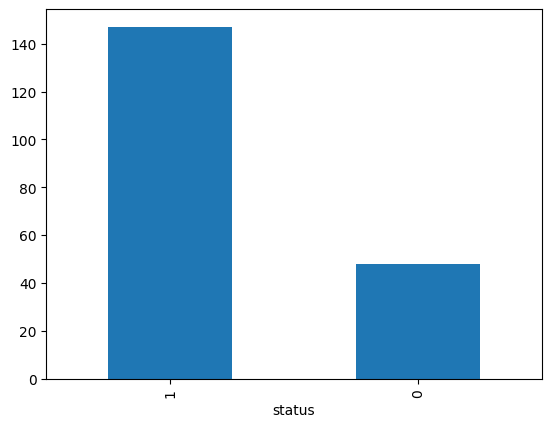

In [10]:
data['status'].value_counts().plot(kind="bar")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
# Check for any missing values
data.isna().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


## 3. Modelling

In [45]:
# Step 1: Drop the "name" column
data = data.drop(columns=['name'], errors='ignore')  # Ensure 'name' is dropped

# Step 2: Define features and target variable
X = data.drop('status', axis=1)  # Features
y = data['status']                # Target

# Step 3: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the model instance
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100
)

# Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Score the model on XGboost
model.score(X_test, y_test)

0.9487179487179487

## Evaluate the model

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.95
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



## Feature Importance

In [52]:
importances = model.feature_importances_
importances

array([0.10359992, 0.05358419, 0.07944531, 0.02179565, 0.03824432,
       0.03633724, 0.02303094, 0.0620979 , 0.02622352, 0.01862574,
       0.01285829, 0.03084419, 0.02775726, 0.03366238, 0.03957802,
       0.02336521, 0.02353212, 0.02353332, 0.10060269, 0.04867265,
       0.03066091, 0.14194821])

In [54]:
# Match features to columns in a dictionary
features_dict = dict(zip(data.columns , importances))
features_dict

{'MDVP:Fo(Hz)': 0.10359992428615764,
 'MDVP:Fhi(Hz)': 0.05358418645348,
 'MDVP:Flo(Hz)': 0.07944531414422223,
 'MDVP:Jitter(%)': 0.021795654250993633,
 'MDVP:Jitter(Abs)': 0.038244324188517004,
 'MDVP:RAP': 0.03633724498616982,
 'MDVP:PPQ': 0.023030937397735273,
 'Jitter:DDP': 0.06209789573119665,
 'MDVP:Shimmer': 0.026223519244503054,
 'MDVP:Shimmer(dB)': 0.01862574423291795,
 'Shimmer:APQ3': 0.012858289775988066,
 'Shimmer:APQ5': 0.030844189381482933,
 'MDVP:APQ': 0.02775726085922552,
 'Shimmer:DDA': 0.03366238041838822,
 'NHR': 0.03957802242845766,
 'HNR': 0.023365207595882214,
 'status': 0.023532121812788864,
 'RPDE': 0.023533321940631898,
 'DFA': 0.10060268505757915,
 'spread1': 0.04867265496847256,
 'spread2': 0.030660908230630973,
 'D2': 0.14194821261457874}

In [ ]:
# compare dfa to status
# compare d2 to status
# compare mdvp(fo)to status

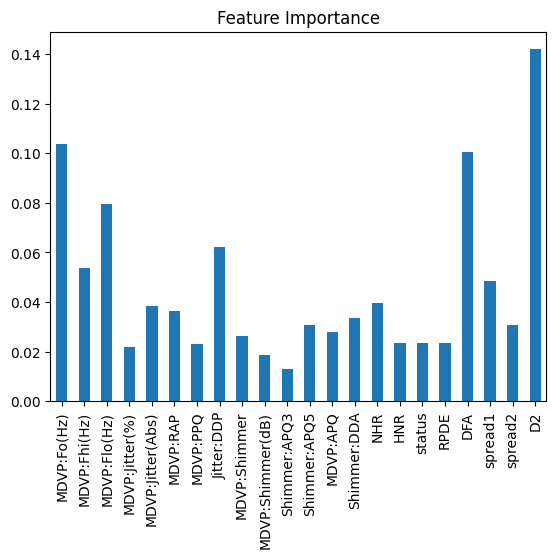

In [55]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);
